#HUBUNGKAN DRIVE

In [ ]:
# Mengkoneksikan penyimpanan ke google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#mengabaikan warning
import warnings
warnings.filterwarnings("ignore")

#2.DATA ACQUISTION

Dataset yang digunakan mengambil data sekunder yang diambil bersal dari github dengan jumlah sebanyak 6.950 data



In [ ]:
#import libarry pandas untuk membaca CSV
import pandas as pd

In [ ]:
#Membaca Dataset
datacustel = pd.read_csv('/content/drive/MyDrive/PROJEK AKHIR/APP/DATASET/telco_dataset.csv')
datacustel.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


#3.DATA EXPLORATION

##a. Mengecek Missing Value

cat : tidak ada missing value

In [ ]:
# Mengecek Mising value
datacustel.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##b. Mengecek Outlier sekaligus menangani outlier

In [ ]:
import matplotlib.pyplot as plt #import matplotlib untuk visualisasi plot
import seaborn as sns #import seaborn untuk membuat grafik dan statistik dengan menggunakan Python

In [ ]:
# Menampilkan statistik dari dataset
datacustel.describe(include='all')

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.0,6.950000e+03,6950,6950,6950,6950.000000,6950,6950,6950,6950,6950.000000,6950.000000,6950
unique,NaN,NaN,2,2,2,NaN,2,2,2,2,NaN,NaN,2
top,NaN,NaN,Male,No,No,NaN,Yes,No,Yes,Yes,NaN,NaN,No
freq,NaN,NaN,3505,5822,3591,NaN,6281,4279,5445,4114,NaN,NaN,5114
mean,202006.0,4.549898e+10,NaN,NaN,NaN,32.423165,NaN,NaN,NaN,NaN,64.992201,2286.058750,NaN
std,0.0,2.854091e+08,NaN,NaN,NaN,24.581073,NaN,NaN,NaN,NaN,30.032040,2265.702553,NaN
min,202006.0,4.500026e+10,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,19.000000,NaN
25%,202006.0,4.525607e+10,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,36.462500,406.975000,NaN
50%,202006.0,4.549871e+10,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,70.450000,1400.850000,NaN
75%,202006.0,4.574384e+10,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,89.850000,3799.837500,NaN


Cat : Nan(karena bentuk nya kategorikal string), maka yang dicek hanya kolom tenure, monthly charges, dan total charges

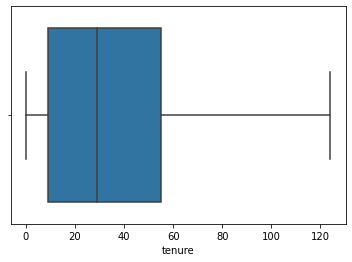

In [ ]:
# memeriksa outlier pada kolom tenure
sns.boxplot(datacustel['tenure'])
plt.show()

Cat : Terdapat outlier pada kolom monthly charges

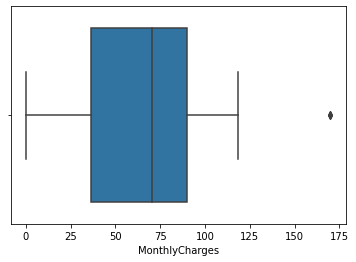

In [ ]:
# memeriksa outlier pada kolom MonthlyCharges
sns.boxplot(datacustel['MonthlyCharges'])
plt.show()

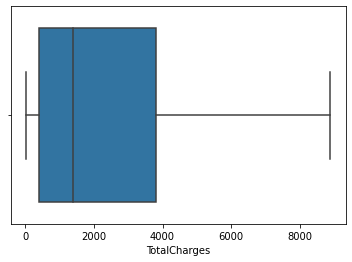

In [ ]:
# memeriksa outlier pada kolom TotalCharges
sns.boxplot(datacustel['TotalCharges'])
plt.show()

In [ ]:
import numpy as np #import numpy untuk ndarry
from scipy import stats #import scipy untuk perhitungan stats zsocre

Cat : mengangani outlier dengan cara hanya mengambil nilai zscore dari datanya dibawah 3, jika diatas 3 maka tidak diambil.

In [ ]:
#kolom yang terdapat outlier
kolom_numerik = ['MonthlyCharges']
#pemebersihan outlier
datacustel = datacustel[(np.abs(stats.zscore(datacustel[kolom_numerik])) < 3).all(axis=1)]

# ukuran dataset setelah pemebersihan outlier
datacustel.shape

(6947, 13)

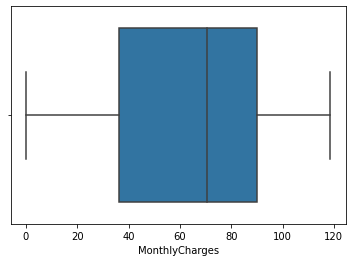

In [ ]:
#kolom monthly charges setelah pembersihan outlier
sns.boxplot(datacustel['MonthlyCharges'])
plt.show()

In [ ]:
#pengecekan nilai Z-Score setelah pembersihan outlier/data zscore nya yang diambil kurang dari 3
np.abs(stats.zscore(datacustel[kolom_numerik]))

,MonthlyCharges
0,1.171573
1,1.483686
2,1.306975
3,1.687519
4,0.544216
...,...
6945,0.674194
6946,0.173686
6947,0.687755
6948,1.742598


##c. Melakukan Label Encoding

Cat : Umumnya, model AI (Machine Learning dan Deep Learning) yang disediakan oleh library Python hanya menerima nilai numerik sebagai input. Kita akan mendapat pesan error jika kita mencoba meng-input nilai kategorik ke dalam model. Hal inilah yang menjadi alasan mengapa kita perlu mengubah kolom kategorik kita menjadi kolom numerik. sehingga kolom yang terdapat kategorik seperti gender, senior citizen, parter, streaming tv, internet service, papers billing dan churn yang awal nya male menjadi 0 dan female = 1, No = 0 dan Yes = 1.

In [ ]:
# label encoding secara manual dengan memanfaatkan fuction map()

# kolom gender
datacustel['gender'] = datacustel['gender'].map({'Male':0, 'Female':1})

# kolom SeniorCitizen
datacustel['SeniorCitizen'] = datacustel['SeniorCitizen'].map({'No':0, 'Yes':1})

# kolom Partner
datacustel['Partner'] = datacustel['Partner'].map({'No':0, 'Yes':1})

# kolom PhoneService
datacustel['PhoneService'] = datacustel['PhoneService'].map({'No':0, 'Yes':1})

# kolom StreamingTV
datacustel['StreamingTV'] = datacustel['StreamingTV'].map({'No':0, 'Yes':1})

# kolom InternetService
datacustel['InternetService'] = datacustel['InternetService'].map({'No':0, 'Yes':1})

# kolom PaperlessBilling
datacustel['PaperlessBilling'] = datacustel['PaperlessBilling'].map({'No':0, 'Yes':1})

# kolomfitur Churn
datacustel['Churn'] = datacustel['Churn'].map({'No':0, 'Yes':1})

In [ ]:
#menampilkan data yang sudah di mapping
datacustel

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,1,0,1,1,0,0,1,1,29.85,29.85,0
1,202006,45315483266,0,0,1,60,1,0,0,1,20.50,1198.80,0
2,202006,45236961615,0,0,0,5,1,1,1,0,104.10,541.90,1
3,202006,45929827382,1,0,1,72,1,1,1,1,115.50,8312.75,0
4,202006,45305082233,1,0,1,56,1,1,1,0,81.25,4620.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,202006,45437311872,0,0,0,1,1,0,1,1,44.75,44.75,0
6946,202006,45184632574,1,1,0,1,1,0,1,1,70.15,70.15,1
6947,202006,45023517923,1,0,0,1,1,1,1,1,85.55,85.55,1
6948,202006,45665022680,1,0,1,72,1,1,1,1,117.15,8529.50,0


##d. Menampilkan korelasi atau hubungan pada setiap kolom

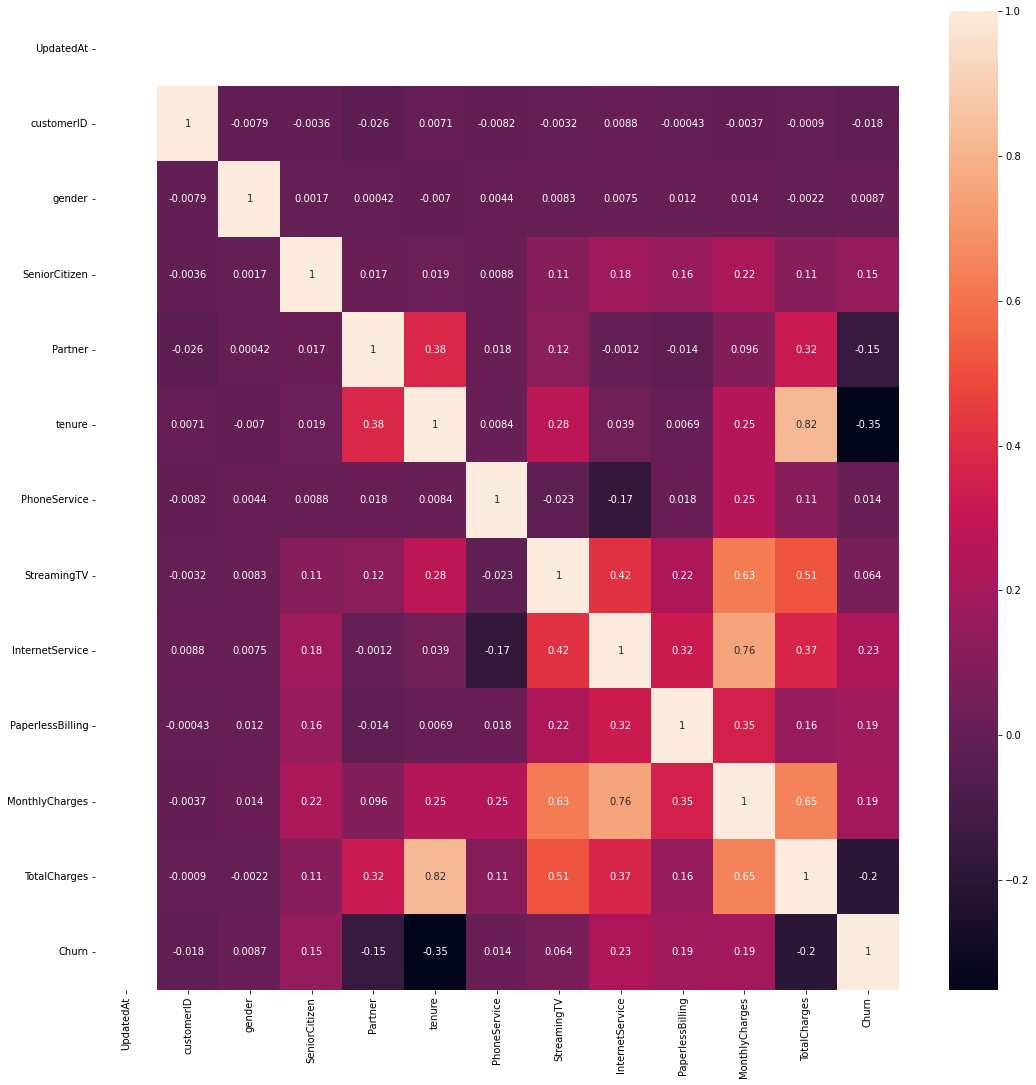

In [ ]:
#heamap korelasi setiap kolom
plt.figure(figsize=(18,18))
sns.heatmap(datacustel.corr(), annot=True)

##e. Memilih kolom/fitur yang akan ditraining

Cat : Kolom yang penting yaitu pada kolom gender, pertner, seniorcitizen, tenure, phoneservice, streamingtv, internetservice, papersbiling, dan monthlycharges dan total charges

In [ ]:
#Slicing data atau pemilihan kolom
X = datacustel.iloc[:, 2 : 12].values #var X dari gender sampai total charges
Y = datacustel.iloc[:, - 1].values #var Y churn

##f. Mengecek data tidak seimbang/imbalancing data pada kolom churn(Y)

Cat : class 0/No cenderung lebih banyak dari pada class 1/Yes, sehingga bisadikatakan tidak seimbang pada kolom churn nya

In [ ]:
#mengecek data fitur churn(Y)
np.unique(Y, return_counts=True)

(array([0, 1]), array([5111, 1836]))

 Cat : sehingga karena nantinya takut terdapat bias karena data tidak seimbang maka dilakuakan nya proses melakukan resample (undersampling atau oversampling) menggunakan

Cat : ovarsampling yang dilakuakn dengan bantuan module SMOTENC. Module SMONTEC

In [ ]:
#import SMOTENC
from imblearn.over_sampling import SMOTENC

In [ ]:
#melakukan imbalancing data dengan Smotenc
sm = SMOTENC(random_state=42, categorical_features=[2,3,4,6,7,8,9]) #kolom bertipe kategorikal seperti 'gender', 'SeniorCitizen', 'PhoneService', 'StreamingTV', 'InternetService', 'PaperlessBilling', 'MonthlyCharges'
print(sm)
X_res, y_res = sm.fit_resample(X, Y)

SMOTEN(random_state=42)


NameError: ignored

Cat : setelah dilakuakan penyimbangan class 0 dan 1 nya menjadi sama nilainya

In [ ]:
#setelah dilakukan nya balancing data penyeimbangan data
np.unique(y_res, return_counts=True)

(array([0, 1]), array([5111, 5111]))

##g. Standarisasi Data

Standarisai diperlukan menyeragamkan nilai-nilai pada data yang memungkinkan pemrosesan data yang efisien

In [ ]:
#import standarscaler
from sklearn.preprocessing import StandardScaler

#scaler data
scaler = StandardScaler()
#training data scaler nya
scaler = scaler.fit(X_res)
#transofrm data scaler nya
X = scaler.transform(X_res)
print(X)

[[ 1.01379104 -0.49519558  1.11783713 ...  0.74333817 -1.34324427
  -0.8891082 ]
 [-0.98639657 -0.49519558  1.11783713 ...  0.74333817 -1.67075589
  -0.36151424]
 [-0.98639657 -0.49519558 -0.8945847  ... -1.34528272  1.25758334
  -0.65799952]
 ...
 [ 1.01379104 -0.49519558 -0.8945847  ...  0.74333817  0.01584141
  -0.75740717]
 [-0.98639657 -0.49519558 -0.8945847  ...  0.74333817  0.19798691
  -0.87024219]
 [ 1.01379104 -0.49519558 -0.8945847  ...  0.74333817 -0.65844723
  -0.82752285]]


##h. Split Train Set & Test Set




Pisahkan feature dan label, hasil oversampling, menjadi train set dan test set menggunakan module train_test_split.

Pembagian train set dan test set yang kita terapkan adalah 80:20.

In [ ]:
#import slpit data
from sklearn.model_selection import train_test_split

#inisialisai data X_train, X_test, y_train, y_test, data dibagi ke dalam 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=42)

print('Train set size : ', X_train.shape, y_train.shape)
print('Test set size  : ', X_test.shape, y_test.shape)

Train set size :  (8177, 10) (8177,)
Test set size  :  (2045, 10) (2045,)


#4.MODELING

In [ ]:
#import grid search untuk mencari tunning terbaik
from sklearn.model_selection import GridSearchCV
#import grid search untuk mencari tunning terbaik
from sklearn.model_selection import StratifiedKFold

Cat : Modeling yang akan digunakan menggunakan KNN dan XGBOOST. Disini menggunakan fungsi gridsearch untuk mencari setting/tunning hyperparameter terbaik dari setiap model nya,

##a.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Cat : tunning hyperparameter untuk KNN menggunkan parameter n_neighbors dengan nilai mencari k dari 2 sampai 21.

In [ ]:
#Parameter
hyperparameters_knn = {'n_neighbors': list(range(2, 21)),
                       'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                       'leaf_size': list(range(2, 21))}

cv = StratifiedKFold(n_splits=11, random_state=0, shuffle=True)

Cat : Setting model KNN terbaik pada n_neighboars = 7

In [ ]:
model_knn = GridSearchCV(KNeighborsClassifier(), hyperparameters_knn, cv=cv, n_jobs=-1, verbose=10)

model_knn.fit(X_train, y_train)
print('Setting model KNN terbaik :', model_knn.best_params_)

Fitting 11 folds for each of 1444 candidates, totalling 15884 fits


##c. SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
hyperparameters_SVC = {'c': [0.1, 0.3],
                       'kernel': ['linear' 'poly']}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
model_nb = GridSearchCV(GaussianNB(), hyperparameters_nb, cv=cv, n_jobs=-1, verbose=10)

model_nb.fit(X_train, y_train)
print('model XGBOST :', model_nb.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
model XGBOST : {'var_smoothing': 0.2848035868435802}


#5.EVALUASI

In [ ]:
from sklearn.metrics import classification_report #import classification report menampilkan laporan klasifikasi
from sklearn import metrics #import metrics unttuk melihat score accuracy

##a.KNN

In [ ]:
y_pred = model_knn.predict(X_test) #predict X_test
print(classification_report(y_test, y_pred)) #menampilkan hasil classification report

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1045
           1       0.80      0.81      0.80      1000

    accuracy                           0.81      2045
   macro avg       0.81      0.81      0.81      2045
weighted avg       0.81      0.81      0.81      2045



In [ ]:
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy :  0.8234071175247646
Test set Accuracy :  0.8078239608801956


##c.Naive Bayes

In [ ]:
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_xgboost.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy :  0.8567934450287391
Test set Accuracy :  0.832762836185819


In [ ]:
y_pred = model_nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72      1045
           1       0.69      0.84      0.76      1000

    accuracy                           0.74      2045
   macro avg       0.75      0.74      0.74      2045
weighted avg       0.76      0.74      0.74      2045



In [ ]:
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_nb.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy :  0.7309526721291427
Test set Accuracy :  0.7427872860635697


##Save Model

In [ ]:
import pickle

In [ ]:
#scaler
pickle.dump(scaler, open('/content/drive/MyDrive/PROJEK AKHIR/APP/MODEL/scaler_churn.pkl', 'wb'))
#model
pickle.dump(model_knn, open('/content/drive/MyDrive/PROJEK AKHIR/APP/MODEL/model_knn.pkl', 'wb'))


In [ ]:
model_xgboost.save_model("/content/drive/MyDrive/PROJEK AKHIR/APP/MODEL/model_xgboost.txt")
pickle.dump(scaler, open('/content/drive/MyDrive/PROJEK AKHIR/APP/MODEL/scaler_churn.txt', 'wb'))

#Kesimpulan